In [2]:
## using tensorflow inbuilt dataset 
import tensorflow as tf 
from tensorflow.keras.datasets import fashion_mnist 

## The data has already been stored into training and test set for us 
(train_data, train_label),  (test_data, test_label) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 25s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 4s 1us/step


In [5]:
train_data.shape

(60000, 28, 28)

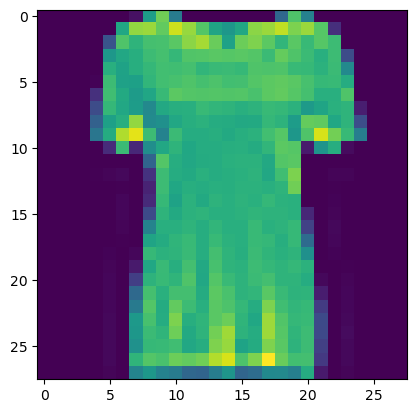

In [7]:
import matplotlib.pyplot as plt 
plt.imshow(train_data[10])

In [9]:
class_name = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_name)

10

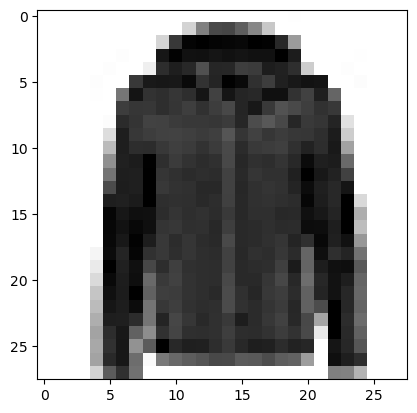

In [13]:
## Plot 
index_of_choice = 5000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)

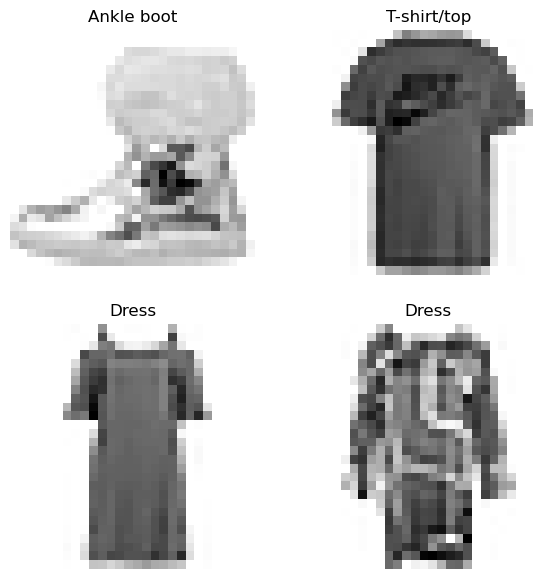

In [30]:
## plot miltiple images examples 

import random

plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.title(class_name[train_label[rand_index]])
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.axis(False)

## Building a model for our multiclass 

In [73]:
## Set random seed 
tf.random.set_seed(42)

# Creating the model 
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax)
])

model_1.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics= [tf.keras.metrics.SparseCategoricalCrossentropy()]
)

history = model_1.fit(train_data, train_label, epochs=10, validation_data=(test_data, test_label))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.2952 - sparse_categorical_crossentropy: 2.2952 - val_loss: 1.9629 - val_sparse_categorical_crossentropy: 1.9629
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.7700 - sparse_categorical_crossentropy: 1.7700 - val_loss: 1.6670 - val_sparse_categorical_crossentropy: 1.6670
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.6099 - sparse_categorical_crossentropy: 1.6099 - val_loss: 1.6378 - val_sparse_categorical_crossentropy: 1.6378
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.5604 - sparse_categorical_crossentropy: 1.5604 - val_loss: 1.5585 - val_sparse_categorical_crossentropy: 1.5585
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.4673 - sparse_categorical_crossentropy: 1.4673 - val_loss: 1.3979 - val_sparse_categorical_crossentropy: 1.3979
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.3431 - sparse_categorical_crossentropy: 1.3431 - val_los

In [66]:
test_data.shape, test_label.shape

((10000, 28, 28), (10000,))

In [74]:
model_1.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_18 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)